In [386]:
import matplotlib.pyplot as plt
import numpy as np
import random


In [387]:
def normal_equation(X, y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

In [388]:

def sin_pi(x):
    return np.sin(np.dot(np.pi, x))


In [389]:

def constant_model(x, c):
    return c * np.ones_like(x)


In [390]:
def hypothesis(x,w):
    return w[0] + w[1] * x


In [391]:

def hypothesis_no_origin(x,w):
    return w * x


In [392]:
def generate_learning_curves(target_func, model_func, train_sizes, n_iter=100):
    val_x = np.linspace(-1, 1, 100)
    val_y = target_func(val_x)

    e_in = []
    e_out = []
    model_params = []

    for train_size in train_sizes:
        train_errors = []
        val_errors = []
        iteration_params = []

        for _ in range(n_iter):
            sam_x = np.array(random.choices(val_x, k=train_size))
            sam_y = target_func(sam_x)

            if model_func == constant_model:
                model_param = np.mean(sam_y)
            else:
                X_b = np.c_[np.ones((sam_x.shape[0], 1)), sam_x] if model_func != hypothesis_no_origin else sam_x.reshape(-1, 1)
                model_param = normal_equation(X_b, sam_y)

            train_loss = np.mean((model_func(sam_x, model_param) - sam_y) ** 2)
            train_errors.append(train_loss)

            val_loss = np.mean((model_func(val_x, model_param) - val_y) ** 2)
            val_errors.append(val_loss)

            iteration_params.append(model_param)

        e_in.append(np.mean(train_errors))
        e_out.append(np.mean(val_errors))
        model_params.append(np.mean(iteration_params, axis=0))

    func_g = model_func(val_x, np.mean(model_params, axis=0))
    bias = np.mean((func_g - val_y)**2)

    return e_in, e_out, bias

In [393]:

def plot_learning_curves(train_sizes, e_in, e_out, bias, model_name):
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, e_in, label=f'E_in ({model_name})', color='b')
    plt.plot(train_sizes, e_out, label=f'E_out ({model_name})', color='r')
    plt.axhline(y=bias, color='g', linestyle=':', label=f'Bias ({bias:.2f})')
    plt.xlabel("Training Set Size")
    plt.ylabel("Expected Error")
    plt.title(model_name)
    plt.legend()
    plt.grid(True)
    plt.show()


<Figure size 1200x800 with 0 Axes>

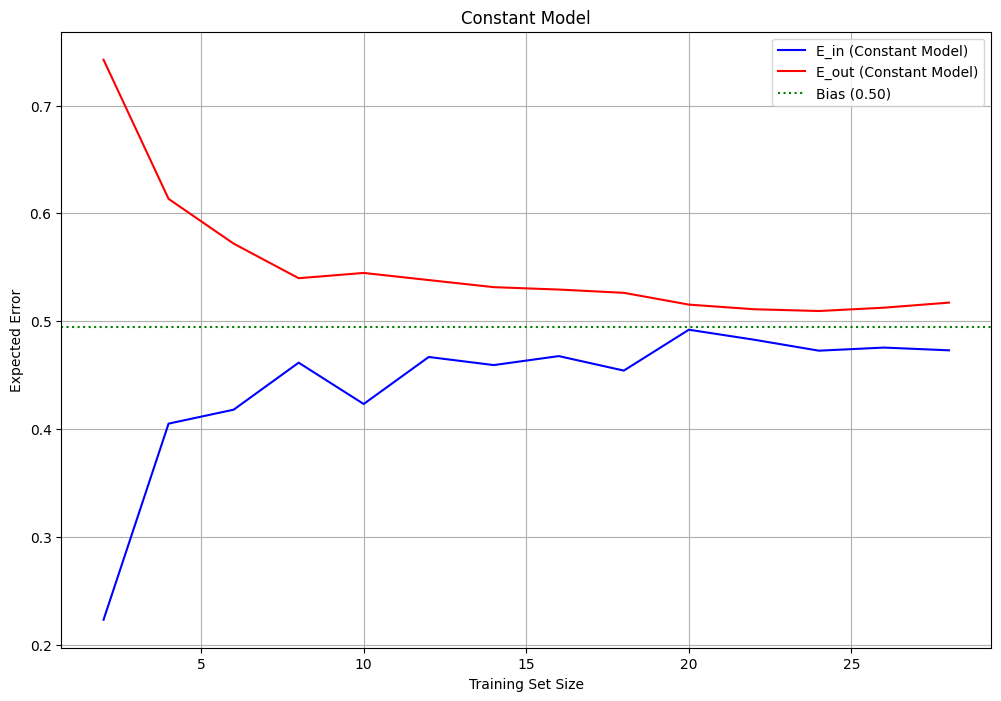

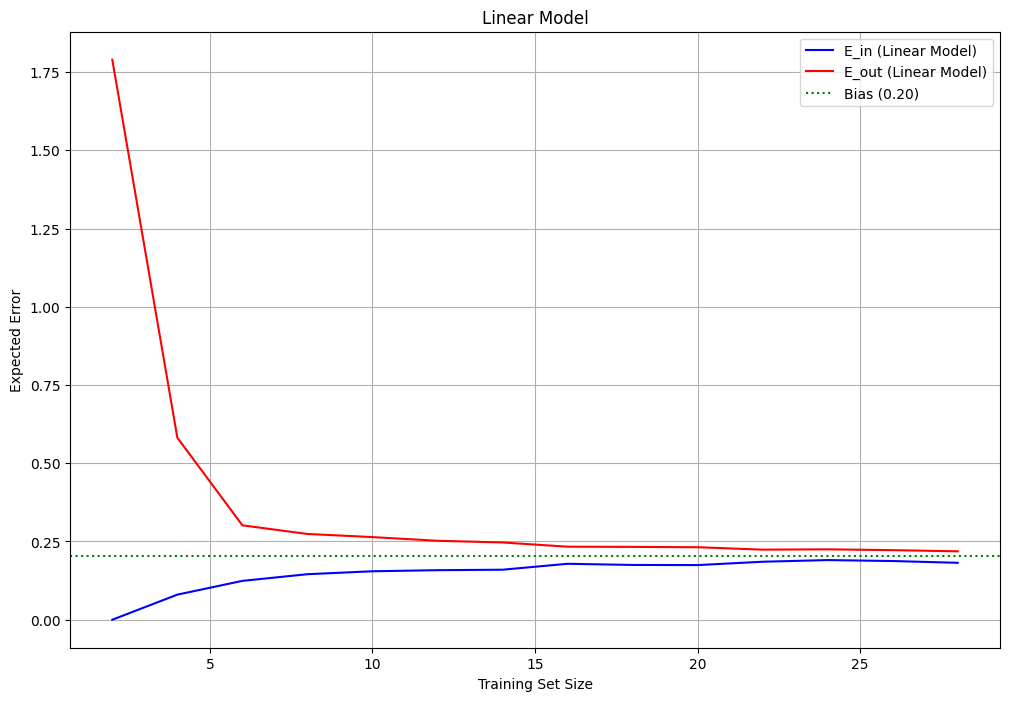

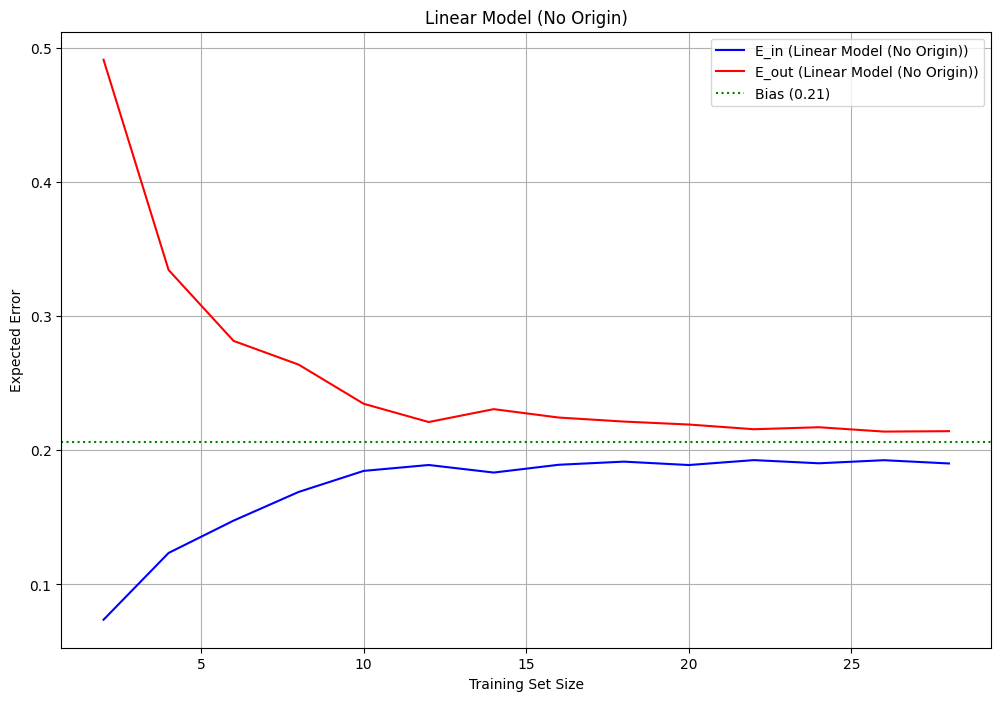

In [394]:
# train_sizes = 50
n_points = 100
train_sizes = range(2, 30, 2)

e_in_const, e_out_const, bias_const = generate_learning_curves(sin_pi, constant_model, train_sizes)
e_in_linear, e_out_linear, bias_linear = generate_learning_curves(sin_pi, hypothesis, train_sizes)
e_in_no_origin, e_out_no_origin, bias_no_origin = generate_learning_curves(sin_pi, hypothesis_no_origin, train_sizes)

# Plot learning curves
plt.figure(figsize=(12, 8))
plot_learning_curves(train_sizes, e_in_const, e_out_const, bias_const, 'Constant Model')
plot_learning_curves(train_sizes, e_in_linear, e_out_linear, bias_linear, 'Linear Model')
plot_learning_curves(train_sizes, e_in_no_origin, e_out_no_origin, bias_no_origin, 'Linear Model (No Origin)')